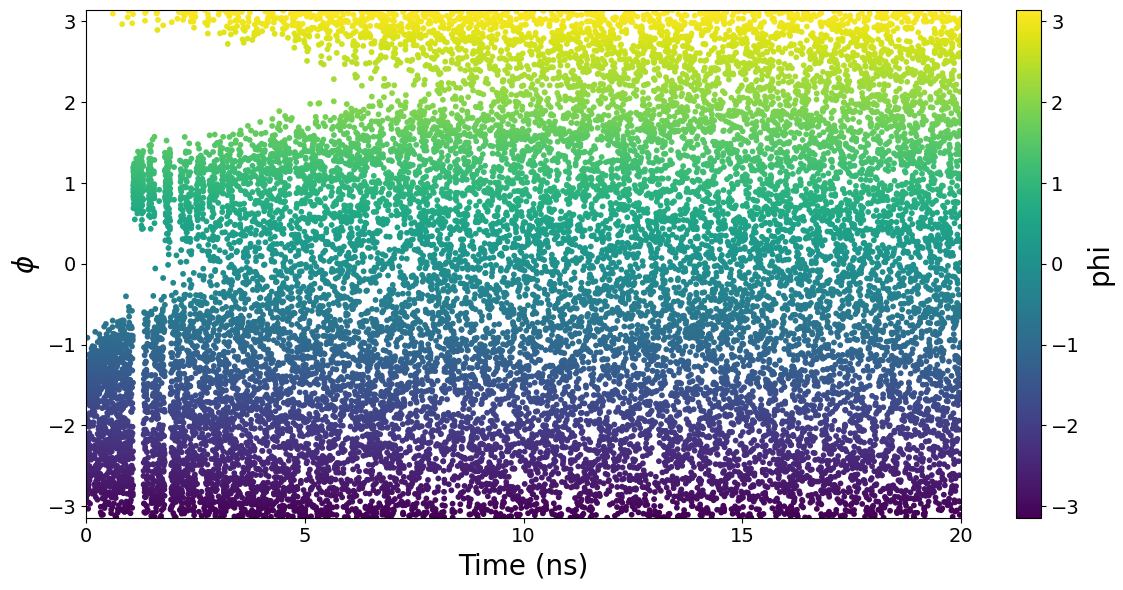

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

ns = '10'

cv_name = {
    'ref': 'phi',
    'phi': 'phi',
    'AE': 'deep.node-0',
    'TAE': 'deep.node-0',
    'VDE': 'deep.node-0',
    'DeepTDA': 'deep.node-0',
    'DeepLDA': 'deep.node-0',
    'DeepTICA': 'deep.node-0',
}
method = 'ref'
# method = 'phi'
# method = 'AE'
# method = 'TAE'
# method = 'VDE'
# method = 'DeepLDA'
# method = 'DeepTDA'
# method = 'DeepTICA'
seed = 0
base_dir = f'/home/guest_sky/geodesic-interpolation-cv/simulations/aldp/{method}/{ns}/log'
date = sorted(os.listdir(base_dir))[-1]
file_path = os.path.join(base_dir, date, str(seed), 'COLVAR')

data = np.loadtxt(file_path, comments='#')
with open(file_path, 'r') as file:
    first_line = file.readline().strip()
keys = first_line.split()[2:]
phi_idx = keys.index('phi')
cv_idx = keys.index(cv_name[method])
phi = data[:, phi_idx][:20001]
cv = data[:,cv_idx][:20001]
time_ns = np.arange(0, 20001) * 0.001  # ns 단위로 시간 배열 생성
# 색상 매핑을 위한 컬러맵
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(cv.min(), cv.max())
colors = cmap(norm(cv))
# 산점도 생성
plt.figure(figsize=(12, 6))
scatter=plt.scatter(time_ns, phi, c=colors, s=10, label=f'{method}')
cbar=plt.colorbar(scatter)
cbar.set_label(cv_name[method],fontsize=20, fontweight="medium")
cbar.ax.tick_params(labelsize=14)
scatter.set_clim(cv.min(), cv.max())
plt.xlabel('Time (ns)', fontsize=20, fontweight="medium")
plt.ylabel(r'$\phi$', fontsize=20, fontweight="medium")
# xtick을 ns 단위로 설정
plt.xlim(0,20)
plt.ylim(-np.pi,np.pi)
plt.xticks(np.arange(0, 21, 5),fontsize=14)  # 0부터 20까지 1ns 간격으로 xtick 설정
plt.yticks(fontsize=14)
# plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig(f'../figures/phi_{method}_{seed}_{ns}.png', dpi=300, bbox_inches="tight")
plt.savefig(f'../figures/phi_{method}_{seed}_{ns}.pdf', dpi=300, bbox_inches="tight")
plt.show()